In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import csv
from scipy import stats
%matplotlib inline

In [2]:
with open('growthR_sim.npy', 'rb') as f:
    wt_sim = np.load(f)
    wt_sim = wt_sim[:,wt_sim[0,:]!=0]
with open('growthR_sim_noisy.npy', 'rb') as f:
    wt_sim_noise = np.load(f)
    wt_sim_noise = wt_sim_noise[:,wt_sim_noise[0,:]!=0]

In [3]:
def normalise(wt_init): # renvoie Wt/W0 pour que toutes les cellules partent du même taux de croissance
    wt=wt_init.copy()
    for i in range(len(wt[0,:])):
        if(wt[0,i]!=0):
            wt[:,i]=wt[:,i]/wt[0,i]
        else:
             wt[:,i]=wt[:,i]*0
    return wt

D'après le texte sur le temps court :
$$\frac{w_t-e^{-\lambda t}\delta_1}{\lambda t}-f$$ est petit (borné en variation totale par $Kt$) pour $t$ petit, où $f$ est la dfe et $w_t$ est la solution *en partant de $\delta_1$* et *sans les morts* et à condition que $\gamma>0$.

Donc : $f$ ressemble, à homothétie près, à $w_{\delta t}-dirac$ : presque aucun travail à faire !

In [32]:
wt_sim_norm=normalise(wt_sim)

# on enlève les mutations létales :
mu=0.01/15
wtn_nd=np.array([wt_sim_norm[i]*np.exp(mu*i) for i in range(len(wt_sim))])

# on estime f :
lambd=0.032/60
f_est=np.array([(wtn_nd[i]) for i in range(1,len(wt_sim))])

(array([9., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        2., 3., 8.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

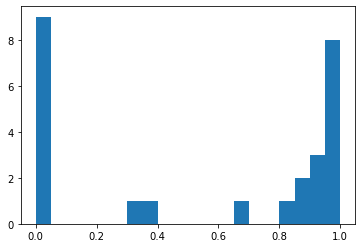

In [53]:
plt.hist(f_est[20],bins=20,range=(0,1))

## Temps jusqu'auquel on pourrait aller :

On a : $$erreur\leqslant \lambda t\exp{4\lambda t}$$

In [54]:
lambd=4*0.32/60 # nb de mutations par photo (1 photo=4 minutes)
t=20
e=lambd*t*np.exp(4*lambd*t)
print(lambd*t,e)

0.42666666666666664 2.351173243043672


Pour $t=20$, 40% des cellules ont muté (~600) et si on avait une infinité de cellules on pourrait estimer la dfe avec une erreur en variation totale de 2.35 : est-ce beaucoup ?

On remarque que très peu de cellules mutées ont un taux de croissance $<<1$.

Compromis :

$\to$ $t$ grand: borne moins bonne d'après l'expression

$\to$ $t$ petit: peu de cellules ont muté donc peu de cellules significatives